# Import thư viện

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import matplotlib.pyplot as plt

import time
import pandas as pd

## Import class SVM

In [80]:
from svm import *
from hog_class import *
from functions import *

In [81]:
n_test = [200, 400, 600]
link_cat = './drive/MyDrive/LTSS/data2/Cat/**'
link_dog = './drive/MyDrive/LTSS/data2/Dog/**'

# So sánh khi không có HOG

In [82]:
acc1_no_hog = []
acc2_no_hog = []
acc3_no_hog = []
acc4_no_hog = []
acc5_no_hog = []
acc6_no_hog = []
time1_no_hog = []
time2_no_hog = []
time3_no_hog = []
time4_no_hog = []
time5_no_hog = []
time6_no_hog = []

In [83]:
for n in n_test:
    X_train, y_train, X_test, y_test = read_data(link_cat, link_dog, n)
    
    x_train = np.array([x.flatten() for x in X_train])
    x_test = np.array([x.flatten() for x in X_test])
    
    y_train_sklearn = np.array([str(y) for y in y_train])
    y_test_sklearn = np.array([str(y) for y in y_test])
    
    start = time.time()
    svm = SVM_New(kernel = 'linear')
    svm.fit(x_train, y_train)
    pred = svm.predict(x_test)
    end = time.time()
    time1_no_hog.append(end-start)
    acc1_no_hog.append(accuracy_score(pred, y_test))
        
    start = time.time()
    svm = SVM_New(kernel = 'rbf')
    svm.fit(x_train, y_train)
    pred = svm.predict(x_test)
    end = time.time()
    time2_no_hog.append(end-start)
    acc2_no_hog.append(accuracy_score(pred, y_test))
    
    start = time.time()
    svm = SVM_Pa(kernel = 'linear')
    svm.fit(x_train, y_train)
    pred = svm.predict(x_test)
    end = time.time()
    time3_no_hog.append(end-start)
    acc3_no_hog.append(accuracy_score(pred, y_test))
        
    start = time.time()
    svm = SVM_Pa(kernel = 'rbf')
    svm.fit(x_train, y_train)
    pred = svm.predict(x_test)
    end = time.time()
    time4_no_hog.append(end-start)
    acc4_no_hog.append(accuracy_score(pred, y_test))
    
    start = time.time()
    svm = SVC(kernel = 'linear', shrinking = True)
    svm.fit(x_train, y_train_sklearn)
    pred = svm.predict(x_test)
    end = time.time()
    time5_no_hog.append(end-start)
    acc5_no_hog.append(accuracy_score(pred, y_test_sklearn))
    
    start = time.time()
    svm = SVC(kernel = 'rbf', shrinking = True)
    svm.fit(x_train, y_train_sklearn)
    pred = svm.predict(x_test)
    end = time.time()
    time6_no_hog.append(end-start)
    acc6_no_hog.append(accuracy_score(pred, y_test_sklearn))

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 14 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 84 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 84 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


# So sánh khi có HOG

In [84]:
blocksize = (2, 2)
cellsize = (8, 8)
nbin = 9
sbin = 40
threadperblock = (32, 32)
hog = HOG_CUDA_2(blocksize, cellsize, nbin, sbin, threadperblock)


acc1_hog = []
acc2_hog = []
acc3_hog = []
acc4_hog = []
acc5_hog = []
acc6_hog = []
time1_hog = []
time2_hog = []
time3_hog = []
time4_hog = []
time5_hog = []
time6_hog = []

In [85]:
for n in n_test:
    X_train, y_train, X_test, y_test = read_data(link_cat, link_dog, n)
    
    x_train = np.array([x.flatten() for x in X_train])
    x_test = np.array([x.flatten() for x in X_test])
    
    y_train_sklearn = np.array([str(y) for y in y_train])
    y_test_sklearn = np.array([str(y) for y in y_test])
    
    start = time.time()
    svm = SVM_New(kernel = 'linear')
    big_fit(X_train, y_train, hog, svm)
    pred = big_predict(X_test, hog, svm)
    end = time.time()
    time1_hog.append(end-start)
    acc1_hog.append(accuracy_score(pred, y_test))
        
    start = time.time()
    svm = SVM_New(kernel = 'rbf')
    big_fit(X_train, y_train, hog, svm)
    pred = big_predict(X_test, hog, svm)
    end = time.time()
    time2_hog.append(end-start)
    acc2_hog.append(accuracy_score(pred, y_test))
    
    start = time.time()
    svm = SVM_Pa(kernel = 'linear')
    big_fit(X_train, y_train, hog, svm)
    pred = big_predict(X_test, hog, svm)
    end = time.time()
    time3_hog.append(end-start)
    acc3_hog.append(accuracy_score(pred, y_test))
        
    start = time.time()
    svm = SVM_Pa(kernel = 'rbf')
    big_fit(X_train, y_train, hog, svm)
    pred = big_predict(X_test, hog, svm)
    end = time.time()
    time4_hog.append(end-start)
    acc4_hog.append(accuracy_score(pred, y_test))
    
    start = time.time()
    svm = SVC(kernel = 'linear', shrinking = True)
    big_fit(X_train, y_train_sklearn, hog, svm)
    pred = big_predict(X_test, hog, svm)
    end = time.time()
    time5_hog.append(end-start)
    acc5_hog.append(accuracy_score(pred, y_test_sklearn))
    
    start = time.time()
    svm = SVC(kernel = 'rbf', shrinking = True)
    big_fit(X_train, y_train_sklearn, hog, svm)
    pred = big_predict(X_test, hog, svm)
    end = time.time()
    time6_hog.append(end-start)
    acc6_hog.append(accuracy_score(pred, y_test_sklearn))

/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


# Plot thời gian chạy

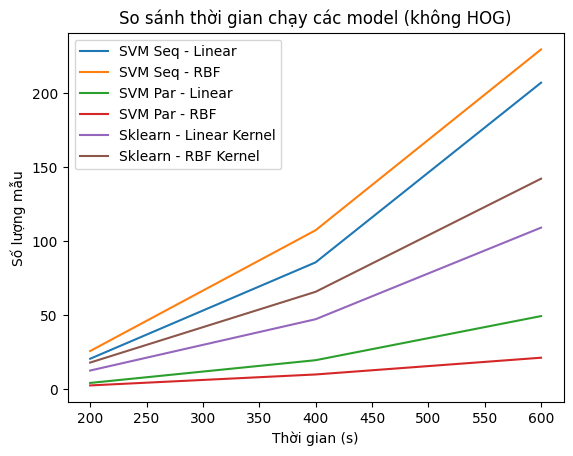

In [90]:
plt.plot(n_test, time1_no_hog, label = 'SVM Seq - Linear')
plt.plot(n_test, time2_no_hog, label = 'SVM Seq - RBF')
plt.plot(n_test, time3_no_hog, label = 'SVM Par - Linear')
plt.plot(n_test, time4_no_hog, label = 'SVM Par - RBF')
plt.plot(n_test, time5_no_hog, label = 'Sklearn - Linear Kernel')
plt.plot(n_test, time6_no_hog, label = 'Sklearn - RBF Kernel')

plt.ylabel("Số lượng mẫu")
plt.xlabel("Thời gian (s)")
plt.title("So sánh thời gian chạy các model (không HOG)")
plt.legend()
plt.show()

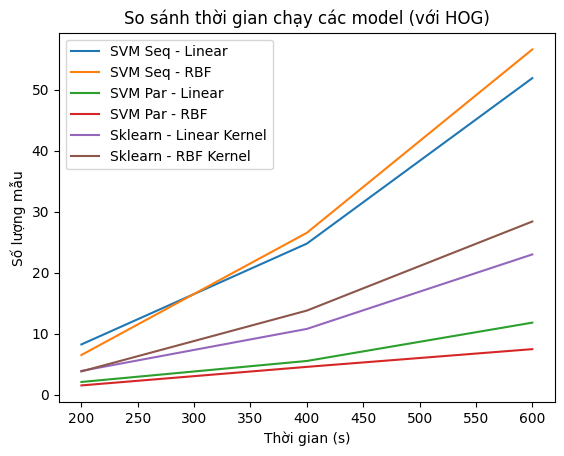

In [92]:
plt.plot(n_test, time1_hog, label = 'SVM Seq - Linear')
plt.plot(n_test, time2_hog, label = 'SVM Seq - RBF')
plt.plot(n_test, time3_hog, label = 'SVM Par - Linear')
plt.plot(n_test, time4_hog, label = 'SVM Par - RBF')
plt.plot(n_test, time5_hog, label = 'Sklearn - Linear Kernel')
plt.plot(n_test, time6_hog, label = 'Sklearn - RBF Kernel')

plt.ylabel("Số lượng mẫu")
plt.xlabel("Thời gian (s)")
plt.title("So sánh thời gian chạy các model (với HOG)")
plt.legend()
plt.show()

# Thông số chi tiết kết quả

In [86]:
df = pd.DataFrame(data = {"Số lượng mẫu": n_test, "SVM Seq Linear Acc": acc1_no_hog, \
    "SVM Seq RBF Acc": acc2_no_hog, "SVM Par Linear Acc": acc3_no_hog, \
        "SVM Par RBF Acc": acc4_no_hog, "Sklearn Linear+Shrink Acc": acc5_no_hog, \
            "Sklearn RBF+Shrink Acc": acc6_no_hog})
df

,Số lượng mẫu,SVM Seq Linear Acc,SVM Seq RBF Acc,SVM Par Linear Acc,SVM Par RBF Acc,Sklearn Linear+Shrink Acc,Sklearn RBF+Shrink Acc
0,200,0.616667,0.616667,0.616667,0.616667,0.616667,0.616667
1,400,0.608333,0.608333,0.608333,0.608333,0.608333,0.608333
2,600,0.577778,0.655556,0.577778,0.655556,0.577778,0.655556


In [87]:
df = pd.DataFrame(data = {"Số lượng mẫu": n_test, "SVM Seq Linear time(s)": time1_no_hog, \
    "SVM Seq RBF time(s)": time2_no_hog, "SVM Par Linear time(s)": time3_no_hog, \
        "SVM Par RBF time(s)": time4_no_hog, "Sklearn Linear+Shrink time(s)": time5_no_hog, \
            "Sklearn RBF+Shrink time(s)": time6_no_hog})
df

,Số lượng mẫu,SVM Seq Linear time(s),SVM Seq RBF time(s),SVM Par Linear time(s),SVM Par RBF time(s),Sklearn Linear+Shrink time(s),Sklearn RBF+Shrink time(s)
0,200,20.517131,25.715087,4.183267,2.501605,12.559470,17.933187
1,400,85.623141,107.327111,19.540666,9.901130,47.216935,65.740937
2,600,206.986410,229.457910,49.336318,21.219466,109.079538,142.136689


In [88]:
df = pd.DataFrame(data = {"Số lượng mẫu": n_test, "SVM Seq Linear + hog Acc": acc1_hog, \
    "SVM Seq RBF + hog Acc": acc2_hog, "SVM Par Linear + hog Acc": acc3_hog, \
        "SVM Par RBF + hog Acc": acc4_hog, "Sklearn Linear+Shrink + hog Acc": acc5_hog, \
            "Sklearn RBF+Shrink + hog Acc": acc6_hog})
df

,Số lượng mẫu,SVM Seq Linear + hog Acc,SVM Seq RBF + hog Acc,SVM Par Linear + hog Acc,SVM Par RBF + hog Acc,Sklearn Linear+Shrink + hog Acc,Sklearn RBF+Shrink + hog Acc
0,200,0.583333,0.583333,0.583333,0.583333,0.583333,0.583333
1,400,0.633333,0.658333,0.633333,0.658333,0.633333,0.658333
2,600,0.672222,0.672222,0.672222,0.672222,0.672222,0.672222


In [89]:
df = pd.DataFrame(data = {"Số lượng mẫu": n_test, "SVM Seq Linear + hog time(s)": time1_hog, \
    "SVM Seq RBF + hog time(s)": time2_hog, "SVM Par Linear + hog time(s)": time3_hog, \
        "SVM Par RBF + hog time(s)": time4_hog, "Sklearn Linear+Shrink + hog time(s)": time5_hog, \
            "Sklearn RBF+Shrink + hog time(s)": time6_hog})
df

,Số lượng mẫu,SVM Seq Linear + hog time(s),SVM Seq RBF + hog time(s),SVM Par Linear + hog time(s),SVM Par RBF + hog time(s),Sklearn Linear+Shrink + hog time(s),Sklearn RBF+Shrink + hog time(s)
0,200,8.243366,6.510083,2.091033,1.525319,3.904234,3.823931
1,400,24.765524,26.538727,5.533688,4.566019,10.787493,13.791406
2,600,51.884848,56.593402,11.813233,7.471791,22.994051,28.388577
